# Визуализация двумерного дерева

Для решения задачи использовался алгоритм Layered-tree-draw с in-order обхомодом, который обсуждался на лекции.

Сначала добавим xml файл



In [ ]:
!git clone https://github.com/Churilinavalentina/visualization_methods.git -b hw1

Cloning into 'visualization_methods'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


На основе xml файла создим списки вершин и ребер.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_graphml('/content/visualization_methods/tree-84n.xml')       # Считываем файл

Nodes = list(G.nodes)            # Список вершин
Edges = list(G.edges)            # Список ребер
Parents = list(G.nodes)           # Список вершин для нахождения корня


Определим корень графа. То есть найдем вершину, в которую не входит ни одно ребро.

In [ ]:
for node in Nodes:               # Каждую вершину
  for edge in Edges:             # ищем в качестве конечной вершины в спике ребер 
    if edge[1] == node:          # Если находим, то удаляем из списка вершин для нахождения корня,
      Parents.remove(node)       # в итоге в Parent остается только 1 вершина

Parent = Parents[0]
print(Parent)

n0


Зададим дополнительные параметры для функции поиска координат (начальные координаты X и Y, словарь для записи координат...)

In [ ]:
pos = {}                         # Создаем словарь для координат. Ключ - это вершина, значение - пара чисел (x, y).
for node in Nodes:               # Ключ - это вершина, значение - пара чисел (x, y).
  pos[node]=(0, 0) 

Y = 0                               #Координата начала по Y
N = 0                               #Номер координаты - X
ParentBack = []                     #Пустой список для записи пути до вершины, для того, чтобы можно было возвращаться назад, 
                                    #при достижении конечной вершины
Stop = len(Nodes)                   #Критерий остановки, который показывает сколько вершин еще не пронумировано

Функция для рассчета координат. Из родительской вершины идем в следующую и так до конца, когда дошли до вершины из которой нет веток, то присваиваем её координату (X соответствует порядку обхода N, Y - уровню). Далее поднимаемся на 1 вершину выше и присваем ей координаты, если они еще не присвоены (это условие существует для того, чтобы можно было обрабатывать не только бинарные графы) и ищем новые ребра из этой вершины и так далее.

In [ ]:
def coord(Edges, Parent, ParentBack, Y, N, pos, Stop):
  for edge in Edges:
    if edge[0] == Parent and pos[edge[1]] == (0, 0):            # Ищем ветку, начало которой - родительская вершина, а конец еще не пронумерован
      ParentBack.append(Parent)                                 # Если такая существает, то начало записываем в список для пути,
      Parent = edge[1]                                          # переприсваиваем родительскую вершину,
      Y = Y-1                                                   # спускаемся по Y ниже
      return coord(Edges, Parent, ParentBack, Y, N, pos, Stop)  # вызываем функцию от обновленных данных.
      
  if pos[Parent] == (0, 0):                                     # Если такой вершины не существует (где начало - родительская, конец еще не пронумерован),
    pos[Parent] = (N, Y)                                        # значит это крайняя вершина, присваем ей координаты
    Stop = Stop - 1                                             # Уменьшаем количество непронумерованных вершин,
    N = N + 1                                                   # Сдвигаемся вправо
  
  if Stop != 0:                                                 # Если ещё не все вершины пронумерованы,
    Y = Y + 1                                                   # возвращаемся наверх на одну ступень,
    if pos[ParentBack[(Y)*-1]] == (0, 0):                       # проверяем предыдущую вершину (последняя в списке пути)
      pos[ParentBack[(Y)*-1]] = (N, Y)                          # присваиваем ей координаты,
      N = N + 1                                                 # сдвигаемся вправо,
      Stop = Stop - 1                                           # уменьшаем количество непронумерованных вершин.
    Parent = ParentBack[(Y)*-1]                                 # Теперь родительской делаем предыдущую вершины,
    ParentBack.remove(Parent)                                   # удаляем её из списка пути
    return coord(Edges, Parent, ParentBack, Y, N, pos, Stop)    # и запускаем функцию заново.

  return pos

_ = coord(Edges, Parent, ParentBack, Y, N, pos, Stop)

Отрисовываем граф

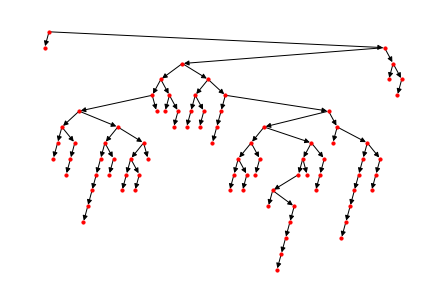

In [ ]:
nx.draw(G, pos = pos, node_color='red', arrows=True, node_size = 10)

plt.show()

